## Data Load

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### Label이 0.0인 데이터 확인

In [3]:
df_0 = df[df['label'] == 0.0]
print(len(df_0))
print(df_0.head())

2119
                            id            source  \
4   boostcamp-sts-v1-train-004     slack-sampled   
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   

                         sentence_1                        sentence_2  label  \
4                        뿌듯뿌듯 하네요!!             꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!    0.0   
14  아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.    0.0   
19           내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.    0.0   
20                 앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^    0.0   
22           답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ    0.0   

    binary-label  
4            0.0  
14           0.0  
19           0.0  
20           0.0  
22           0.0  


## Down sampling - 1000 data

### token 수가 3개 이상인 문장 선별
뽑은 문장을 augmentation하려면 의미가 어느정도 있는 문장(tokens_len>=3)이어야 한다고 판단

In [4]:
df_filtered = df_0[
    (df_0['sentence_1'].apply(lambda x: len(x.split())) >= 3) & 
    (df_0['sentence_2'].apply(lambda x: len(x.split())) >= 3)
]

print(len(df_filtered))
print(df_filtered.head())

1696
                            id            source  \
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   
23  boostcamp-sts-v1-train-023      nsmc-sampled   

                              sentence_1                        sentence_2  \
14       아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.   
19                내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.   
20                      앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^   
22                답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ   
23  노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..           조금유치하지만 가볍게 볼수는 있는영화네요!   

    label  binary-label  
14    0.0           0.0  
19    0.0           0.0  
20    0.0           0.0  
22    0.0           0.0  
23    0.0           0.0  


### K-TACC 증강 방법 중 random_masking_insertion을 진행했을 때, 증강이 되는 문장 선별
1. filtered 문장 전체 augmentation 진행 (filtered: label이 0.0이면서 tokens_len>=3)
2. 문장 변화 없는 데이터셋 제외할 것

- filtered 문장 전체 augmentation 진행

In [5]:
from BERT_augmentation import BERT_Augmentation

BERT_aug = BERT_Augmentation()
random_masking_insertion = BERT_aug.random_masking_insertion

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [6]:
df_filtered['sentence_1_bert'] = df_filtered['sentence_1'].apply(lambda x: random_masking_insertion(x))
df_filtered['sentence_2_bert'] = df_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))
print(df_filtered.head())

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8809/2557564840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentence_1_bert'] = df_filtered['sentence_1'].apply(lambda x: random_masking_insertion(x))


                            id            source  \
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   
23  boostcamp-sts-v1-train-023      nsmc-sampled   

                              sentence_1                        sentence_2  \
14       아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.   
19                내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.   
20                      앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^   
22                답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ   
23  노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..           조금유치하지만 가볍게 볼수는 있는영화네요!   

    label  binary-label                         sentence_1_bert  \
14    0.0           0.0      아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.   
19    0.0           0.0                - 내년 러시아월드컵 자진포기 청원드립니다.   
20    0.0        

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8809/2557564840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentence_2_bert'] = df_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))


- 문장 변화 없는 데이터셋 제외

In [7]:
group_1 = df_filtered[df_filtered['sentence_1'] != df_filtered['sentence_1_bert']]
group_1 = group_1[['sentence_1', 'sentence_1_bert']]
# group_1 = pd.DataFrame(group_1)
# group_1.to_csv('group_1.csv')
group_1

,sentence_1,sentence_1_bert
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,사위가 장모한테 반말을 예의도없고 배운것도 없나요?,사위가 장모한테 반말을 예의도없고 배운것도 별로 없나요?
9237,다음에는 하와이서 보는걸로? ㅋㅋ,그럼 다음에는 하와이서 보는걸로? ㅋㅋ
9250,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요.,형광도료를 써서 더 안전하게 잘 보일 수 있도록 도와주세요.
9266,국민연금 .. 어려운이들에게는 희망이될수있게 자율해지를..,국민연금.. 어려운이들에게는. 희망이될수있게 자율해지를..


In [8]:
group_2 = df_filtered[df_filtered['sentence_2'] != df_filtered['sentence_2_bert']]
group_2 = group_2[['sentence_2', 'sentence_2_bert']]
# group_2 = pd.DataFrame(group_2)
# group_2.to_csv('group_2.csv')
group_2

,sentence_2,sentence_2_bert
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9254,나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....,점점 나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....
9262,국민을 살릴려면 관광산업을 키워주세요.,국민을 살릴려면 관광산업을 더 키워주세요.
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"
9274,대만박스오피스 1위 대만 클라스 보소 -_-;;,"대만박스오피스 1위, 대만 클라스 보소 - _ - ; ;"


- sentence_1과 sentence_2 모두 변형된 index만 고려

In [9]:
common_index = group_1.index.intersection(group_2.index)
group_1_common = group_1.loc[common_index]
group_2_common = group_2.loc[common_index]

In [10]:
group_1_common = group_1_common.rename(columns={
    'sentence_1': 'sentence_1',
    'sentence_1_bert': 'sentence_2'
})
group_1_common

,sentence_1,sentence_2
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,사위가 장모한테 반말을 예의도없고 배운것도 없나요?,사위가 장모한테 반말을 예의도없고 배운것도 별로 없나요?
9237,다음에는 하와이서 보는걸로? ㅋㅋ,그럼 다음에는 하와이서 보는걸로? ㅋㅋ
9250,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요.,형광도료를 써서 더 안전하게 잘 보일 수 있도록 도와주세요.
9266,국민연금 .. 어려운이들에게는 희망이될수있게 자율해지를..,국민연금.. 어려운이들에게는. 희망이될수있게 자율해지를..


In [11]:
group_2_common = group_2_common.rename(columns={
    'sentence_2': 'sentence_1',
    'sentence_2_bert': 'sentence_2'
})
group_2_common

,sentence_1,sentence_2
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"


### sentence_1을 기준으로 유사도가 높은 상위 1000개 문장 선별
1. 코사인 유사도 계산 함수 정의
2. sentence와 sentence_bert 열 간의 코사인 유사도가 높은 상위 1000개의 행을 추출

- cosine similarity 계산 함수 정의

In [12]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("jhgan/ko-sbert-nli")
model = AutoModel.from_pretrained("jhgan/ko-sbert-nli")

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
import torch

def get_emb(sentences):
#Mean Pooling - Take attention mask into account for correct averaging
  def mean_pooling(model_output, attention_mask):
      token_embeddings = model_output[0] #First element of model_output contains all token embeddings
      input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
      return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

  # Load model from HuggingFace Hub
  tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-nli')
  model = AutoModel.from_pretrained('jhgan/ko-sbert-nli')

  sen1 = []
  sen2 = []
  # Tokenize sentences
  for sentence in sentences:
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling. In this case, mean pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    sen1.append(sentence_embeddings[0])
    sen2.append(sentence_embeddings[1])
  return sen1, sen2

In [14]:
def cos_sim(sen1, sen2):
  ans = []
  for a, b in zip(sen1, sen2):
    ans.append((torch.dot(a, b) / (torch.norm(a)*torch.norm(b))).item())
  return ans

- group_1_common에서 sentence와 sentence_bert 열 간의 코사인 유사도가 높은 상위 1000개의 행을 추출

In [15]:
sentences = list(zip(group_1_common['sentence_1'], group_1_common['sentence_2']))
sen1, sen2 = get_emb(sentences)
group_1_common['cos_sim'] = cos_sim(sen1, sen2)

In [16]:
group_1_common = group_1_common.sort_values(by='cos_sim', ascending=False)
group_1_common

,sentence_1,sentence_2,cos_sim
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693
...,...,...,...
8086,70세 이상도 기초연금 주세요,70세 이상도 아닌 기초연금 주세요,0.796387
4057,작가는 가난을 먹고 살지 않습니다.,작가는 결코 가난을 먹고 살지 않습니다.,0.775431
466,애들은 용에 환장할 듯,애들은 사냥 용에 환장할 듯,0.765792
5638,저는 사실 우리 중에 제일 좋은 홈가드닝 환경 가지고 계시는 얘기가 제일 기대되는 ㅎㅎ,저는 사실 우리 중에 제일 안 좋은 그런 홈가드닝 환경 가지고 계시는 얘기가 제일 ...,0.753312


In [17]:
top_1000_1 = group_1_common.iloc[:1000]
top_1000_1.to_csv('top_1000_1.csv')
top_1000_1

,sentence_1,sentence_2,cos_sim
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693
...,...,...,...
212,시대를 타지 않는 명작...셰익스피어 원작 그자체,시대를 타지 않는 한 명작... 셰익스피어 원작 그자체,0.960833
1517,공유가 필요하신 페이지 링크 공유주실 수 있을까요?,공유가 필요하신 페이지 링크 공유주실 알 수 있을까요?,0.960741
7036,진짜 빨리 써주셨네요 ㅎㅎ,진짜 너무 빨리 써주셨네요 ㅎㅎ,0.960638
2825,이정도면 잘 만들어진 속편,이정도면 잘 만들어진다 속편,0.960484


- group_2_common에서 group_1_common에 있는 인덱스만 남김

In [18]:
group_2_common = group_2_common[group_2_common.index.isin(top_1000_1.index)]
group_2_common

,sentence_1,sentence_2
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
46,저는 사과나 우유에 프로틴타서 먹어요 ㅎㅎ,저는 사과나 우유에만 프로틴타서 먹어요 ㅎㅎ
54,여성가족부 폐지하고 그 예산을 좀 더 올바르게 사용했으면 좋겠습니다.,여성가족부 폐지하고 그 예산을 좀 더 올바르게 잘 사용했으면 좋겠습니다.
...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"


In [19]:
sentences = list(zip(group_2_common['sentence_1'], group_2_common['sentence_2']))
sen1, sen2 = get_emb(sentences)
group_2_common['cos_sim'] = cos_sim(sen1, sen2)

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8809/3492810768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2_common['cos_sim'] = cos_sim(sen1, sen2)


In [20]:
top_1000_2 = group_2_common.sort_values(by='cos_sim', ascending=False)
top_1000_2.iloc[[888, 984]] = top_1000_2.iloc[[984, 888]].values
top_1000_2.iloc[[964, 981]] = top_1000_2.iloc[[981, 964]].values

In [21]:
top_1000_2 = group_2_common.sort_values(by='cos_sim', ascending=False).iloc[:967]
top_1000_2.to_csv('top_1000_2.csv')
top_1000_2

,sentence_1,sentence_2,cos_sim
4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000
3149,아 뻔한 스토리 ......ㅡ..ㅡ,아 뻔한 스토리....... ㅡ.. ㅡ,0.999486
2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481
2945,150만원 이하 통장압류 금지법 ... 빨리 만들어주세요 ...,150만원 이하 통장압류 금지법... 빨리 만들어주세요....,0.999343
1118,넘나 좋았던 제주도 비양도 캠핑... 크억.. 사진보니 너무 땡기네요ㅎㅎ,넘나 좋았던 제주도 비양도 캠핑... 크억... 사진보니 너무 땡기네요ㅎㅎ,0.999253
...,...,...,...
7767,이렇게 또 우리 회사 웨이 교육받고 갑니다...,이렇게 또 다시 우리 회사 웨이 교육받고 갑니다...,0.912923
2782,지방직 공무원도 육아기단축근무 허용해주세요~!!!!!!!!,모든 지방직 공무원도 육아기단축근무 허용해주세요 ~!!!!!!!!,0.912012
1933,그럼 전 놋북 덮고 뛰러 갑니다,그럼 전에 놋북 덮고 뛰러 갑니다,0.911901
9053,오랫만에 즐겨보게 된 드라마,오랫만에 즐겨보게 된 SBS 드라마,0.911351


### Down Sampling
위 1000개의 데이터셋에 해당하는 index는 0.0 label에서 cut

In [22]:
dataset = df[~df.index.isin(top_1000_1.index)]
dataset = pd.DataFrame(dataset)
dataset.to_csv('downsampling_only.csv')
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


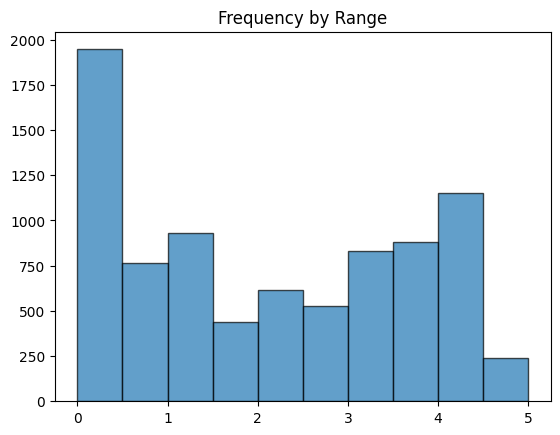

In [23]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = list(dataset['label'].values)

# 히스토그램으로 빈도수 분포를 시각화 (bin 설정 가능)
bins = np.arange(1, max(frequencies) + 2, 0.5) - 1  # 빈도를 기준으로 bin을 설정
print(bins)
plt.hist(frequencies, bins=bins[:-1], edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title('Frequency by Range')

# 그래프 표시
plt.show()

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_8809/37785825.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")


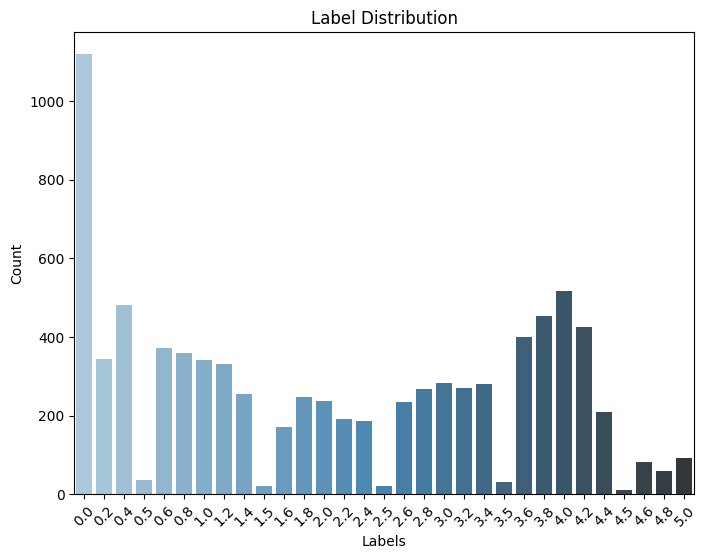

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 라벨 값의 개수를 집계
label_counts = dataset['label'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")

# 그래프 설정
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()